In [7]:
# import pandas as pd
# import requests
# from bs4 import BeautifulSoup

# twitter_handle = []

# for row in wiz_per_game.find_all('tr')[1:]:
#     player = {}
    
#     # Taking the row's first hyperlink (player's url ending) and appending it to the base url 
#     # to get the player's personal webpage url. 
#     player_url = ('https://www.basketball-reference.com/' + row.find('a').attrs['href'])
    
#     # Making a new BeautifulSoup instance of the player's webpage and narrowing it to the top section
#     player_rest = requests.get(player_url)
#     player_soup = BeautifulSoup(player_rest.content, 'lxml')
#     player_info = player_soup.find(name = 'div', attrs = {'id' : 'meta'})
#     # Adding player's name for clarity
#     player['Name'] = row.find('a').text.strip()
    
#     # Creating a list of all the hyperlinks from player_info
#     player_links= []
#     for link in player_info.find_all('a'):
#         player_links.append(link.get('href'))
    
#     # If a player's twitter exists, the link is second in the player_links list. If it doesn't exist, 
#     # the value is set to 'Not Listed'.
#     if 'twitter' in player_links[1]:
#         player['Twitter Handle'] = player_links[1].replace('https://twitter.com/', '')
#     else:
#         player['Twitter Handle'] = 'Not Listed'
        
#     twitter_handle.append(player)
    
# pd.DataFrame(twitter_handle)


In [2]:
import pandas as pd
import requests
import re
from bs4 import BeautifulSoup
from time import sleep
# URL for the Washington Wizards Basketball Reference page
wiz_url = (f'https://www.basketball-reference.com/teams/WAS/2021.html')

# The requests library can send a GET request to the wiz_url
wiz_res = requests.get(wiz_url)

# BeautifulSoup library parses the content of an HTML document, in this case wiz_res
wiz_soup = BeautifulSoup(wiz_res.content, 'lxml')

# BeautifulSoup's .find() method searches for a tag and specified attributes, 
# returning the first match 
wiz_per_game = wiz_soup.find(name = 'table', attrs = {'id' : 'per_game'})

# Making a list of dictionaries to then convert into a pd.DataFrame
wiz_info = []
for row in wiz_per_game.find_all('tr')[1:]:  # Excluding the first 'tr', since that's the table's title head
    
    player = {}
    player['Player'] = row.find('a').text.strip()
    player['Age'] = row.find('td', {'data-stat' : 'age'}).text

    player['DWS'] = row.find('td', {'data-stat' : 'drb_per_g'}).text
    player['OWS'] = row.find('td', {'data-stat' : 'orb_per_g'}).text

    player['PTS'] = row.find('td', {'data-stat' : 'pts_per_g'}).text

    player_url = ('https://www.basketball-reference.com/' + row.find('a').attrs['href'])
    player_rest = requests.get(player_url)
    player_soup = BeautifulSoup(player_rest.content, 'lxml')
    player_info = player_soup.find(name = 'div', attrs = {'id' : 'meta'})
    player_links= []
    for link in player_info.find_all('a'):
        player_links.append(link.get('href'))

    if 'twitter' in player_links[1]:
        player['Twitter Handle'] = player_links[1].replace('https://twitter.com/', '')
    else:
        player['Twitter Handle'] = 'Not Listed'

    s = str(player_info.find_all('p'))
    # with open("sinfo.html", "w") as file:
    #     file.write(s)
    # Find the p tag that contains the height and weight

    # Open the file and read the HTML content
    with open("sinfo.html", "r") as file:
        html_content = file.read()
    
    # Parse the HTML with BeautifulSoup
    soup = BeautifulSoup(html_content, 'lxml')
    
    # Use a regular expression to find the height and weight
    height_weight_match = re.search(r'\((\d+cm),\s*(\d+kg)\)', s)
    
    # Check if the height and weight were found
    if height_weight_match:
        height, weight = height_weight_match.groups()
    else:
        print("The height and weight information could not be found.")
    player['Height'] = height.rstrip('cm')
    player['Weight (Lbs)'] = weight.rstrip('kg')
    # player['Position'] = position.group(1).strip()
    
    wiz_info.append(player)

temp = pd.DataFrame(wiz_info)
temp.to_csv("data_corr.csv",header=True,index=False)


<!DOCTYPE html>
<html class="no-js" data-root="/home/bbr/build" data-version="klecko-" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport"/>
  <link href="https://cdn.ssref.net/req/202405231" rel="dns-prefetch"/>
  <!-- yes-inmobi-ssi -->
  <!-- InMobi Choice. Consent Manager Tag v3.0 (for TCF 2.2) -->
  <script async="true" type="text/javascript">
   (function() {
  var host = window.location.hostname;
  var element = document.createElement('script');
  var firstScript = document.getElementsByTagName('script')[0];
  var url = 'https://cmp.inmobi.com'
    .concat('/choice/', 'XwNYEpNeFfhfr', '/', host, '/choice.js?tag_version=V3');
  var uspTries = 0;
  var uspTriesLimit = 3;
  element.async = true;
  element.type = 'text/javascript';
  element.src = url;

  firstScript.parentNode.insertBefore(element, firstScript);

  function makeStub() {
    va

***************

Age and PTS: slope = 0.3464810649946614 , intercept = 0.21594084372657107 , r_value = 0.22424369658194795 , p_value = 0.031641630332735884 , std_err = 0.1587210770174011
***************

***************

DWS and PTS: slope = 2.286992077203505 , intercept = 2.5255755633861723 , r_value = 0.5114479266104957 , p_value = 1.8881793906931623e-07 , std_err = 0.4050363567699402
***************

***************

OWS and PTS: slope = 0.5921941084811164 , intercept = 8.788613773546556 , r_value = 0.05085284691446358 , p_value = 0.6302279607020469 , std_err = 1.225928901652879
***************



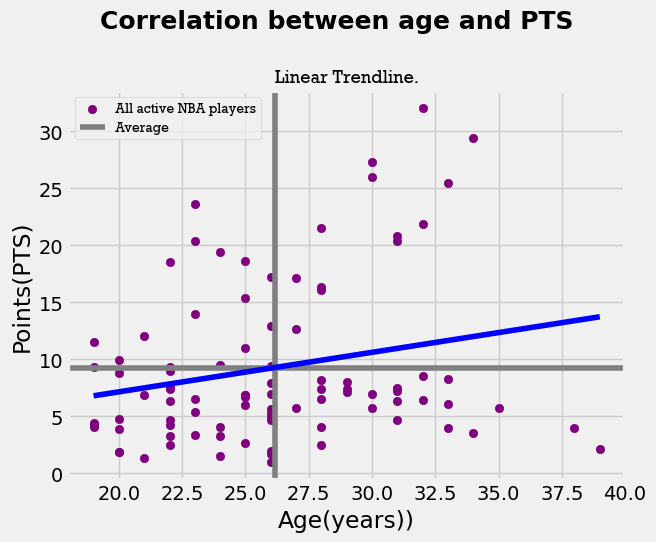

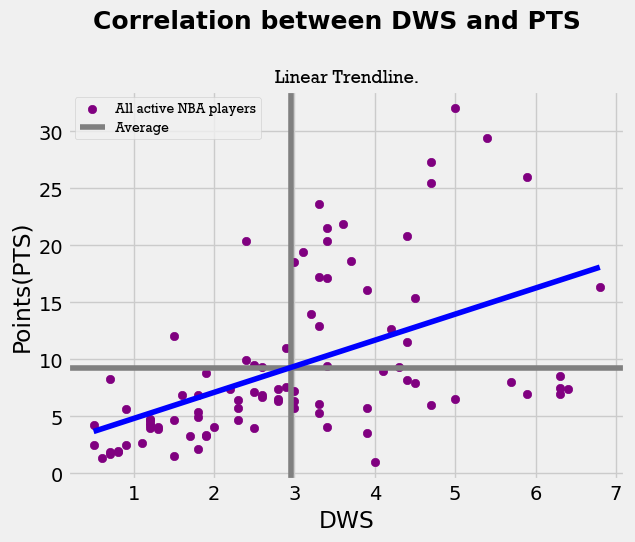

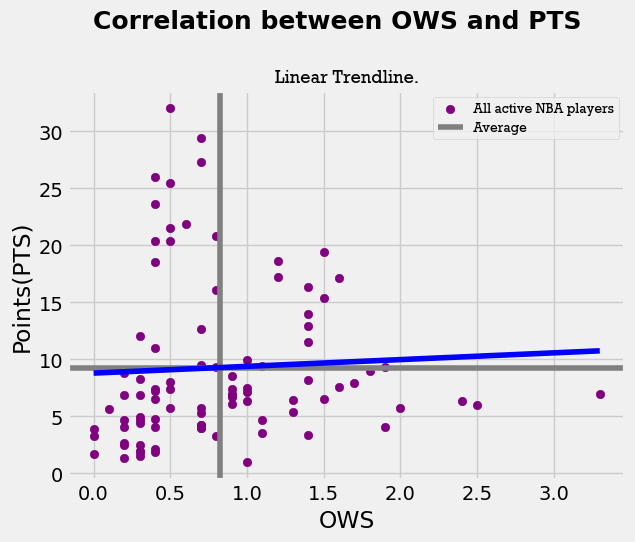

In [ ]:
%matplotlib inline

import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import csv
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt

# Replace what is inside the quotes with wherever you placed the file
with open('wiz_stats.csv') as csvfile:
    readCSVplayer = csv.reader(csvfile, delimiter = ',')
    next(readCSVplayer)
    player = []
    age = []
    DWS = []
    OWS = []
    PTS = []
 
    for row in readCSVplayer:
        currPlayer = row[0]
        currAge = row[1]
        currDWS = row[2]
        currOWS = row[3]
        currPTS=row[4]

        player.append(currPlayer)
        age.append(currAge)
        DWS.append(currDWS)
        OWS.append(currOWS)
        PTS.append(currPTS)
        
floatAge = [float(i) for i in age]
floatDWS = [float(i) for i in DWS]
floatOWS = [float(i) for i in OWS]
floatPTS = [float(i) for i in PTS]

plt.style.use('fivethirtyeight')
 
agePlotPTS, ax = plt.subplots()
DWSPlotPTS, ax2 = plt.subplots()
OWSPlotPTS, ax3 = plt.subplots()

#Ax is between age and PTS. 
ax.scatter(floatAge, floatPTS, label = "All active NBA players", color = 'purple')
ax.axvline(x = np.mean(floatAge), color = 'grey') #X-axis
ax.axhline(y = np.mean(floatPTS), label = "Average", color = 'grey') #Y-axis
agePlotPTS.suptitle("Correlation between age and PTS", weight = 'bold', size = 18, y = 1.05)
ax.set_title("Linear Trendline.", size = 12, fontname = 'Rockwell')
ax.set_xlabel("Age(years))")
ax.set_ylabel("Points(PTS)")

ax.plot(np.unique(floatAge), np.poly1d(np.polyfit(floatAge, floatPTS, 1))(np.unique(floatAge)), 'blue')
 
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})

print("***************\n")
slope, intercept, r_value, p_value, std_err = linregress(floatAge, floatPTS)
print("Age and PTS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 7))
print("***************\n")
 
# Ax2 is between DWS and PTS.
ax2.scatter(floatDWS, floatPTS, label = "All active NBA players", color = 'purple')
ax2.axvline(x = np.mean(floatDWS), color = 'grey')
ax2.axhline(y = np.mean(floatPTS), label = "Average", color = 'grey')
DWSPlotPTS.suptitle("Correlation between DWS and PTS", weight = 'bold', size = 18, y = 1.05)
ax2.set_title("Linear Trendline.", size = 12, fontname = 'Rockwell')
ax2.set_xlabel("DWS")
ax2.set_ylabel("Points(PTS)") 

ax2.plot(np.unique(floatDWS), np.poly1d(np.polyfit(floatDWS, floatPTS, 1))(np.unique(floatDWS)), 'blue')
 
ax2.legend(loc='best', prop={'size': 9, 'family': 'Rockwell'})
print("***************\n")
slope, intercept, r_value, p_value, std_err = linregress(floatDWS, floatPTS)
print("DWS and PTS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3))
print("***************\n")

# Ax2 is between OWS and PTS.
ax3.scatter(floatOWS, floatPTS, label = "All active NBA players", color = 'purple')
ax3.axvline(x = np.mean(floatOWS), color = 'grey')
ax3.axhline(y = np.mean(floatPTS), label = "Average", color = 'grey')
OWSPlotPTS.suptitle("Correlation between OWS and PTS", weight = 'bold', size = 18, y = 1.05)
ax3.set_title("Linear Trendline.", size = 12, fontname = 'Rockwell')
ax3.set_xlabel("OWS")
ax3.set_ylabel("Points(PTS)") 

ax3.plot(np.unique(floatOWS), np.poly1d(np.polyfit(floatOWS, floatPTS, 1))(np.unique(floatOWS)), 'blue')
 
ax3.legend(loc='best', prop={'size': 9, 'family': 'Rockwell'})
print("***************\n")
slope, intercept, r_value, p_value, std_err = linregress(floatOWS, floatPTS)
print("OWS and PTS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3))
print("***************\n")
 

# Remove if you do not want to save the figures in your working directory
# Change the DPI to adjust image size
agePlotPTS.savefig('age-PTS-linear.png', dpi = 400, bbox_inches = 'tight')
DWSPlotPTS.savefig('DWS-PTS-linear.png', dpi = 400, bbox_inches = 'tight')
OWSPlotPTS.savefig('OWS-PTS-linear.png', dpi = 400, bbox_inches = 'tight')

In [46]:
#Calculating correlations with the wiz_stats data

import pandas as pd
player_data = pd.read_csv("data_corr.csv")
player_data_cleaned = player_data[["PTS","Weight (Lbs)","Height"]]
data = []
Output = open("Correleations.txt","w")

for i in range (len(player_data_cleaned.columns)):
    data.append(player_data_cleaned[player_data_cleaned.columns[i]])

for i in range(0,len(data)-1):
    for j in range(i+1,len(data)):
        correlation = data[i].corr(data[j]) #Calculate correlation coefficient
        Output.write(f"Correlation of {player_data_cleaned.columns[i]} and {player_data_cleaned.columns[j]}: {"":10} {correlation}\n")
        print(f"Correlation of {player_data_cleaned.columns[i]} and {player_data_cleaned.columns[j]}: {"":10} {correlation}\n")
        
Output.close()

Correlation of PTS and Weight (Lbs):            0.0710455804049308

Correlation of PTS and Height:            -0.13457938919958876

Correlation of Weight (Lbs) and Height:            0.8375470365702434

